# Perceptron

**Single Layer Perceptron**은 최초로 제안된 신경 모델로 Neural Network에서 가장 간단한 형태다. Single Layer Perceptron은 **Linear classifier(선형 분류)** 을 수행할 수 있다.

Single Layer Perceptron의 **목표**는 Weight 벡터 W와 Bias 파라미터 b로 매개 변수화된 선형 결정 함수를 찾는 것이다.

이를 위해서는 다음과 같이 예측 레이블 **$\hat{y}$** 은 입력 데이터 $x_i$와 실제 레이블 $y_i$가 일치하지 않을 때마다 이러한 매개 변수를 조금씩 조정하여 학습을 진행한다.

$\hat{y} = f(\sum_{i=1}^{d} WX + b)$

- **$y$** : actual/expected output
- **$\hat{y}$** : predicted output
- **$f()$** : non-linear function
- **$d$** : number of features 
- **$W$** : Weight vector
- **$X$** : Input data vector
- **$b$** : Bias parameter

**학습의 목표**는 입출력 관계를 가장 잘 포착하는 $w$와 $b$를 찾는 것이다.

Neural Network은 뇌의 뉴런을 바탕으로 만들어졌다. 그래서 다음과 같이 신경망 모델은 생물학적 뉴련과 형태가 비슷하다.

![1](https://github.com/junsu9637/Artificial-Intelligence/blob/main/Cheat%20Sheet/Artificial%20Intelligence%20Cheat%20Sheet/Image/Perceptron_01.png?raw=true)

![2](Image/Perceptron_02.png)

위 그림을 보면 각 뉴런의 **Input(x)** 과 Input의 **Weight(w)** 의 곱을 수행하고 **Bias(b)** 를 더한 후 이를 **Activation function(f(x))** 에 적용하는 것을 볼 수 있다.

클래스 예측은 다음 그림과 같이 특정 샘플의 활성화가 사전 정의된 임계값보다 큰 f(z) 출력을 발생하는지에 따라 달라진다. 이러한 함수를 **non-linear function**이라고 한다. $b$의 경우 $w_0$로 대체하기도 한다.

![3](Image/Perceptron_03.png)

Perceptron을 코드로 구현하면 다음과 같다.

위 코드를 부분적을 살펴보자.

## 전역 변수 설정

In [8]:
NUM_FEATURES = 2
NUM_ITER = 2000
learning_rate = 0.01

**Learning rate**는 0.01이 표준값이다. 이는 모델이 얼마나 빨리 배워야 하는지를 나타낸다. Learning rate로 인해 Perceptron이 매우 빠르게 바뀔 수 있기 때문에 Machine Learning에서 사용하는 Hyper parameter 중에서 가장 중요하다고 할 수 있다.

## 논리적 AND 연산 수행

이를 구현하기 위해 **sigmoid function**을 활성화 함수로 사용하고 **cross-entropy loss**를 위한 **gradient descent**를 사용한다.

**sigmoid function**의 수식은 다음과 같다.

$h(x) = \frac{1}{1+e^{-x}}$

이 함수 값은 \[0, 1\] 영역의 값이고, 전체 함수 값의 총 합이 1이기 때문에 확률 분포로 해석할 수 있다. 이러한 특성을 활용하여  softmax cross-entropy loss를 sigmoid activation으로 공식화할 수 있다.

Before Learning Weight :[0. 0.]
Before Learning Bias :[0.]
After Learning Weight :[2.69495   2.6909127]
After Learning Bias:[-4.268221]
plot_y: [1.7864611 0.3843605]


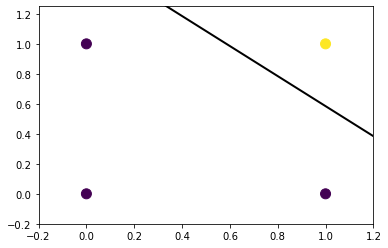

In [17]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32) # 4x2, input
y = np.array([0, 0, 1, 0], np.float32) # 4, correct output
 
W = np.zeros(NUM_FEATURES, np.float32) # 2x1, weight
b = np.zeros(1, np.float32) # 1x1

print('Before Learning Weight :' + str(W))
print('Before Learning Bias :' + str(b))
 
N, d = np.shape(x) # number of samples and number of features
 
# 각 샘플을 개별적을 처리
for k in range(NUM_ITER):
    for j in range(N):
        yHat_j = x[j, :].dot(W) + b # 1x2, 2x1
        yHat_j = 1.0 / (1.0 + np.exp(-yHat_j)) # sigmoid
 
        err = y[j] - yHat_j
        deltaW = err * x[j, :]
        deltaB = err
        W = W + learning_rate * deltaW
        b = b + learning_rate * deltaB
        
# 벡터화를 통한 개선 코드
'''
for k in range(NUM_ITER):
    yHat = x.dot(W) + b
    yHat = 1.0 / (1.0 + np.exp(-yHat))
    err = y - yHat
    deltaW = np.transpose(x).dot(err)           # have to 2x1
    deltaB = np.sum(err)                        # have to 1x1. collect error from all the 4 samples
    W = W + learning_rate * deltaW
    b = b + learning_rate * deltaB
'''

# 적합선 계산
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b) # comes from, w0*x + w1*y + b = 0 then y = (-1/w1) (w0*x + b)
 
    
# 출력
print('After Learning Weight :' + str(W))
print('After Learning Bias:' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

- x :  4x2 입력 데이터(4는 sample의 수, 2는 feature의 수)
- W : Weight로 데이터 dimensionality(차원성)의 크기
- d : feature의 수(=데이터의 dimensionality)

각 샘플은 각 반복에서 별도로 처리한다. Model은 Prediction을 수정하기 위해 매번 `y-yHat` 오차를 계산한다.

W, b를 갱신하는 과정을 반복하면서 yHat이 점점 y에 가까워진다.

flot_y의 공식은 다음과 같다. 

$w_1 x + w_2 y + b$를 변형하여 다음과 같이 표현한다.

$y = -\frac{1}{w_2}(w_1 x + b)$

이런 식을 통해 산출한 예측에 의한 오류를 delta라고 표기한다. 퍼셉트론은 Learnong rate를 이용하여 Weight와 Bias를 조절하여 다음 예측이 조금 더 나아지게 만든다.

위 코드는 매 반복마다 각 샘플을 하나씩 처리한다. 다음과 같이 공식을 벡터화하고, 루프를 위한 여분을 제거하면 프로그램을 더 빠르게 실행할 수 있다.

In [12]:
for k in range(NUM_ITER):
    yHat = x.dot(W) + b
    yHat = 1.0 / (1.0 + np.exp(-yHat))
 
    err = y - yHat
 
    deltaW = np.transpose(x).dot(err) # have to 2x1
    deltaB = np.sum(err) # have to 1x1. collect error from all the 4 samples
    W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
    b = b + learning_rate * deltaB

위 코드에서 deltaW와 deltaB는 오차항과 곱하기 전에 입력 x를 전치한다. 이러한 방식은 선형 대수 기법이라고 한다.

크기가 4x2인 x와 크기가 4x1인 err에서 2x1 크기의 weight 배열을 얻을 수 있는 유일한 방법은 x를 전치하고 err와 곱하는 방법이다. 따라서 **deltaW**에서 x를 전치 후 err과 곱하여 2x1 배열을 얻는다.

**deltaB**는 4개의 오차항을 모두 합하여 모든 샘플에서 발생한 오류를 수집한다.

아래 코드는 위 코드를 수정하여 100번 학습을 진행할 때 마다 Weight, Bias, gradient를 출력하도록 만들었다.

In [28]:
x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)
y = np.array([0, 0, 1, 0], np.float32)
 
W = np.zeros(NUM_FEATURES, np.float32)
b = np.zeros(1, np.float32)
 
N, d = np.shape(x)

cnt = 0

for k in range(NUM_ITER):
    yHat = x.dot(W) + b
    yHat = 1.0 / (1.0 + np.exp(-yHat))
    err = y - yHat
    deltaW = np.transpose(x).dot(err)
    deltaB = np.sum(err)    
    W = W + learning_rate * deltaW
    b = b + learning_rate * deltaB
    cnt = cnt + 1
    
    if(cnt % 100 == 0):
        plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
        plot_y = - 1 / W[1] * (W[0] * plot_x + b)
        print('Weight :' + str(W))
        print('Bias:' + str(b))
        print('gradient :' + str(plot_y))

Weight :[0.14675088 0.14675088]
Bias:[-0.6805278]
gradient :[4.8372993 3.4372995]
Weight :[0.38720825 0.38720825]
Bias:[-1.0805309]
gradient :[2.990568  1.5905678]
Weight :[0.62093836 0.62093836]
Bias:[-1.3953761]
gradient :[2.4472055 1.0472054]
Weight :[0.8321302 0.8321302]
Bias:[-1.6704844]
gradient :[2.2074797 0.8074796]
Weight :[1.0215605 1.0215605]
Bias:[-1.9193554]
gradient :[2.0788465 0.6788463]
Weight :[1.1926794 1.1926794]
Bias:[-2.147776]
gradient :[2.000799 0.600799]
Weight :[1.348727 1.348727]
Bias:[-2.359253]
gradient :[1.9492441  0.54924417]
Weight :[1.4923031 1.4923031]
Bias:[-2.5563436]
gradient :[1.9130191 0.5130189]
Weight :[1.6254281 1.6254281]
Bias:[-2.7410414]
gradient :[1.8863506  0.48635048]
Weight :[1.7496762 1.7496762]
Bias:[-2.9149487]
gradient :[1.8659933 0.4659932]
Weight :[1.8662899 1.8662899]
Bias:[-3.0793707]
gradient :[1.849996  0.4499959]
Weight :[1.9762589 1.9762589]
Bias:[-3.2353826]
gradient :[1.837125   0.43712485]
Weight :[2.0803878 2.0803878]
Bias